<a href="https://colab.research.google.com/github/PDahal2871/ML-Projects/blob/master/DigitsRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [0]:
train = pd.read_csv('train.csv')

In [0]:
test = pd.read_csv('test.csv')

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_y = train.label
#train_y = np_utils.to_categorical(train_y)
train_y.shape

(42000,)

In [0]:
train_X = train.iloc[:,1:]

In [0]:
# Take all the value for reshaping -1, dimension (28,28), colour 1
train_X = train_X.values.reshape(-1,28,28)
test_X = test.values.reshape(-1,28,28)
test_X.shape

(28000, 28, 28)

In [0]:
train_X = np.expand_dims(train_X, axis=3)/255.0 #expanding dimension to 3 for width,height,color
test_X = np.expand_dims(test_X, axis=3)/255.0

In [0]:
test_X[0].shape

(28, 28, 1)

In [0]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs['accuracy'] == 1.0):
      print("Accuracy is at max, ending the epochs")
      self.model.stop_training = True

In [0]:
callbacks = MyCallBack()

In [0]:
def augmented_data(x_data, y_data, batch_size):
  train_datagen = ImageDataGenerator(rotation_range=5, width_shift_range=0.15,height_shift_range=0.15, zoom_range=0.15,
                  shear_range = 0.1)
  train_datagen.fit(x_data)
  train_generator = train_datagen.flow(x_data, y_data, batch_size=batch_size, shuffle=True)
  return train_generator


In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), padding = 'same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (5,5), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [0]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state=0, test_size=0.2)

In [0]:
aug_data = augmented_data(X_train, y_train, batch_size=128)

In [0]:
history = model.fit(aug_data, epochs=30, steps_per_epoch=int(len(X_train)/128), 
                 validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/30
262/262 [==============================] - 17s 63ms/step - loss: 0.3191 - accuracy: 0.8960 - val_loss: 3.8560 - val_accuracy: 0.2045
Epoch 2/30
 37/262 [===>..........................] - ETA: 12s - loss: 0.1075 - accuracy: 0.9673

KeyboardInterrupt: ignored

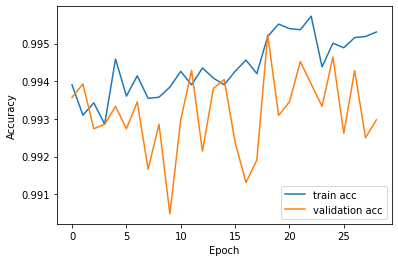

In [0]:
plt.plot(history.history['accuracy'][1:], label='train acc')
plt.plot(history.history['val_accuracy'][1:], label='validation acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [0]:
aug_train_data = augmented_data(train_X, train_y, 128)
history = model.fit(aug_train_data, epochs=30, steps_per_epoch=int(len(train_X)/128), callbacks=[callbacks])

Epoch 1/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0157 - accuracy: 0.9958
Epoch 2/30
328/328 [==============================] - 19s 59ms/step - loss: 0.0166 - accuracy: 0.9961
Epoch 3/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0176 - accuracy: 0.9955
Epoch 4/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0134 - accuracy: 0.9963
Epoch 5/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0160 - accuracy: 0.9960
Epoch 6/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0131 - accuracy: 0.9962
Epoch 7/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0141 - accuracy: 0.9966
Epoch 8/30
328/328 [==============================] - 19s 59ms/step - loss: 0.0151 - accuracy: 0.9963
Epoch 9/30
328/328 [==============================] - 19s 58ms/step - loss: 0.0171 - accuracy: 0.9957
Epoch 10/30
328/328 [==============================] - 19s 59ms/step - loss: 0.013

In [0]:
pred_y = model.predict(test_X)
pred_y = np.argmax(pred_y, axis=1)

In [0]:
out_df = pd.read_csv('sample_submission.csv')
out_df.Label = pred_y
out_df.to_csv("output.csv", index=False)

In [0]:
out_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
